<img src="assets/Star_wars_1977_us.svg.png" width="350" style="margin-left:auto; margin-right:auto" />

<h1><center>Project: Star Wars Survey</center></h1>
<i><center>
C-3PO: Sir, the possibility of successfully navigating an asteroid field is approximately 3720 to 1. 
<center><i>

<i><center>
Han Solo: Never tell me the odds.
<center><i>

#### The Goal

The main focus of this project is the comprehensive cleaning and analysis of a survey dataset related to the Star Wars series. The data set includes various information, including respondents' opinions, preferences, and answers to specific questions about various aspects of the Star Wars films. Given the nature of survey data, which often includes multiple-choice questions and varying response formats, a careful cleaning process is essential to ensure the consistency and reliability of the data set.

The analysis phase examines patterns within the data set and provides insights into audience feelings and preferences regarding the Star Wars films. By using data science techniques, this project aims to derive meaningful conclusions from the survey data and shed light on respondents' diverse perspectives and engagement with the iconic Star Wars franchise.

#### The Data

The data was gathered from team [FiveThirtyEight](http://fivethirtyeight.com/). They asked themselfs, if the rest of America realize that 'The Empire Strikes Back' is clearly the best of the bunch? To answer this question, they surveyed `Star Wars` fans using the online tool `SurveyMonkey`. The dataset is available on their GitHub [repository](https://github.com/fivethirtyeight/data/tree/master/star-wars-survey).

The data has several columns, including the following:

- `RespondentID`: An anonymized ID for the respondent (person taking the survey)
- `Gender`: the respondent's gender
- `Age`: the respondent's age
- `Household Income`: the respondent's income
- `Education`: the respondent's education level
- `Location (Census Region)`: the respondent's location
- `Have you seen any of the 6 films in the Star Wars franchise?`: a Yes or No response
- `Do you consider yourself to be a fan of the Star Wars film franchise?`: a Yes or No response

In addition to the aforementioned columns, there are several other columns containing answers to questions about the Star Wars movies. In instances where respondents were required to select one or more options, the resulting data format poses challenges for representation within a single column. Consequently, extensive data cleaning is necessary for optimal utilization of this dataset.

#### Empower the engines and let's embark on our journey through the galaxy.
Lets start this intergalactic journey of data exploration, we are ready to unveil the hidden stars within the survey dataset. Armed with the power of data science, our quest involves untangling the complex web of responses. May the data be with us as we venture into the heart of this galactic survey analysis.

*This project was completed as part of the Data Science Career Path offered by dataquest.io.*
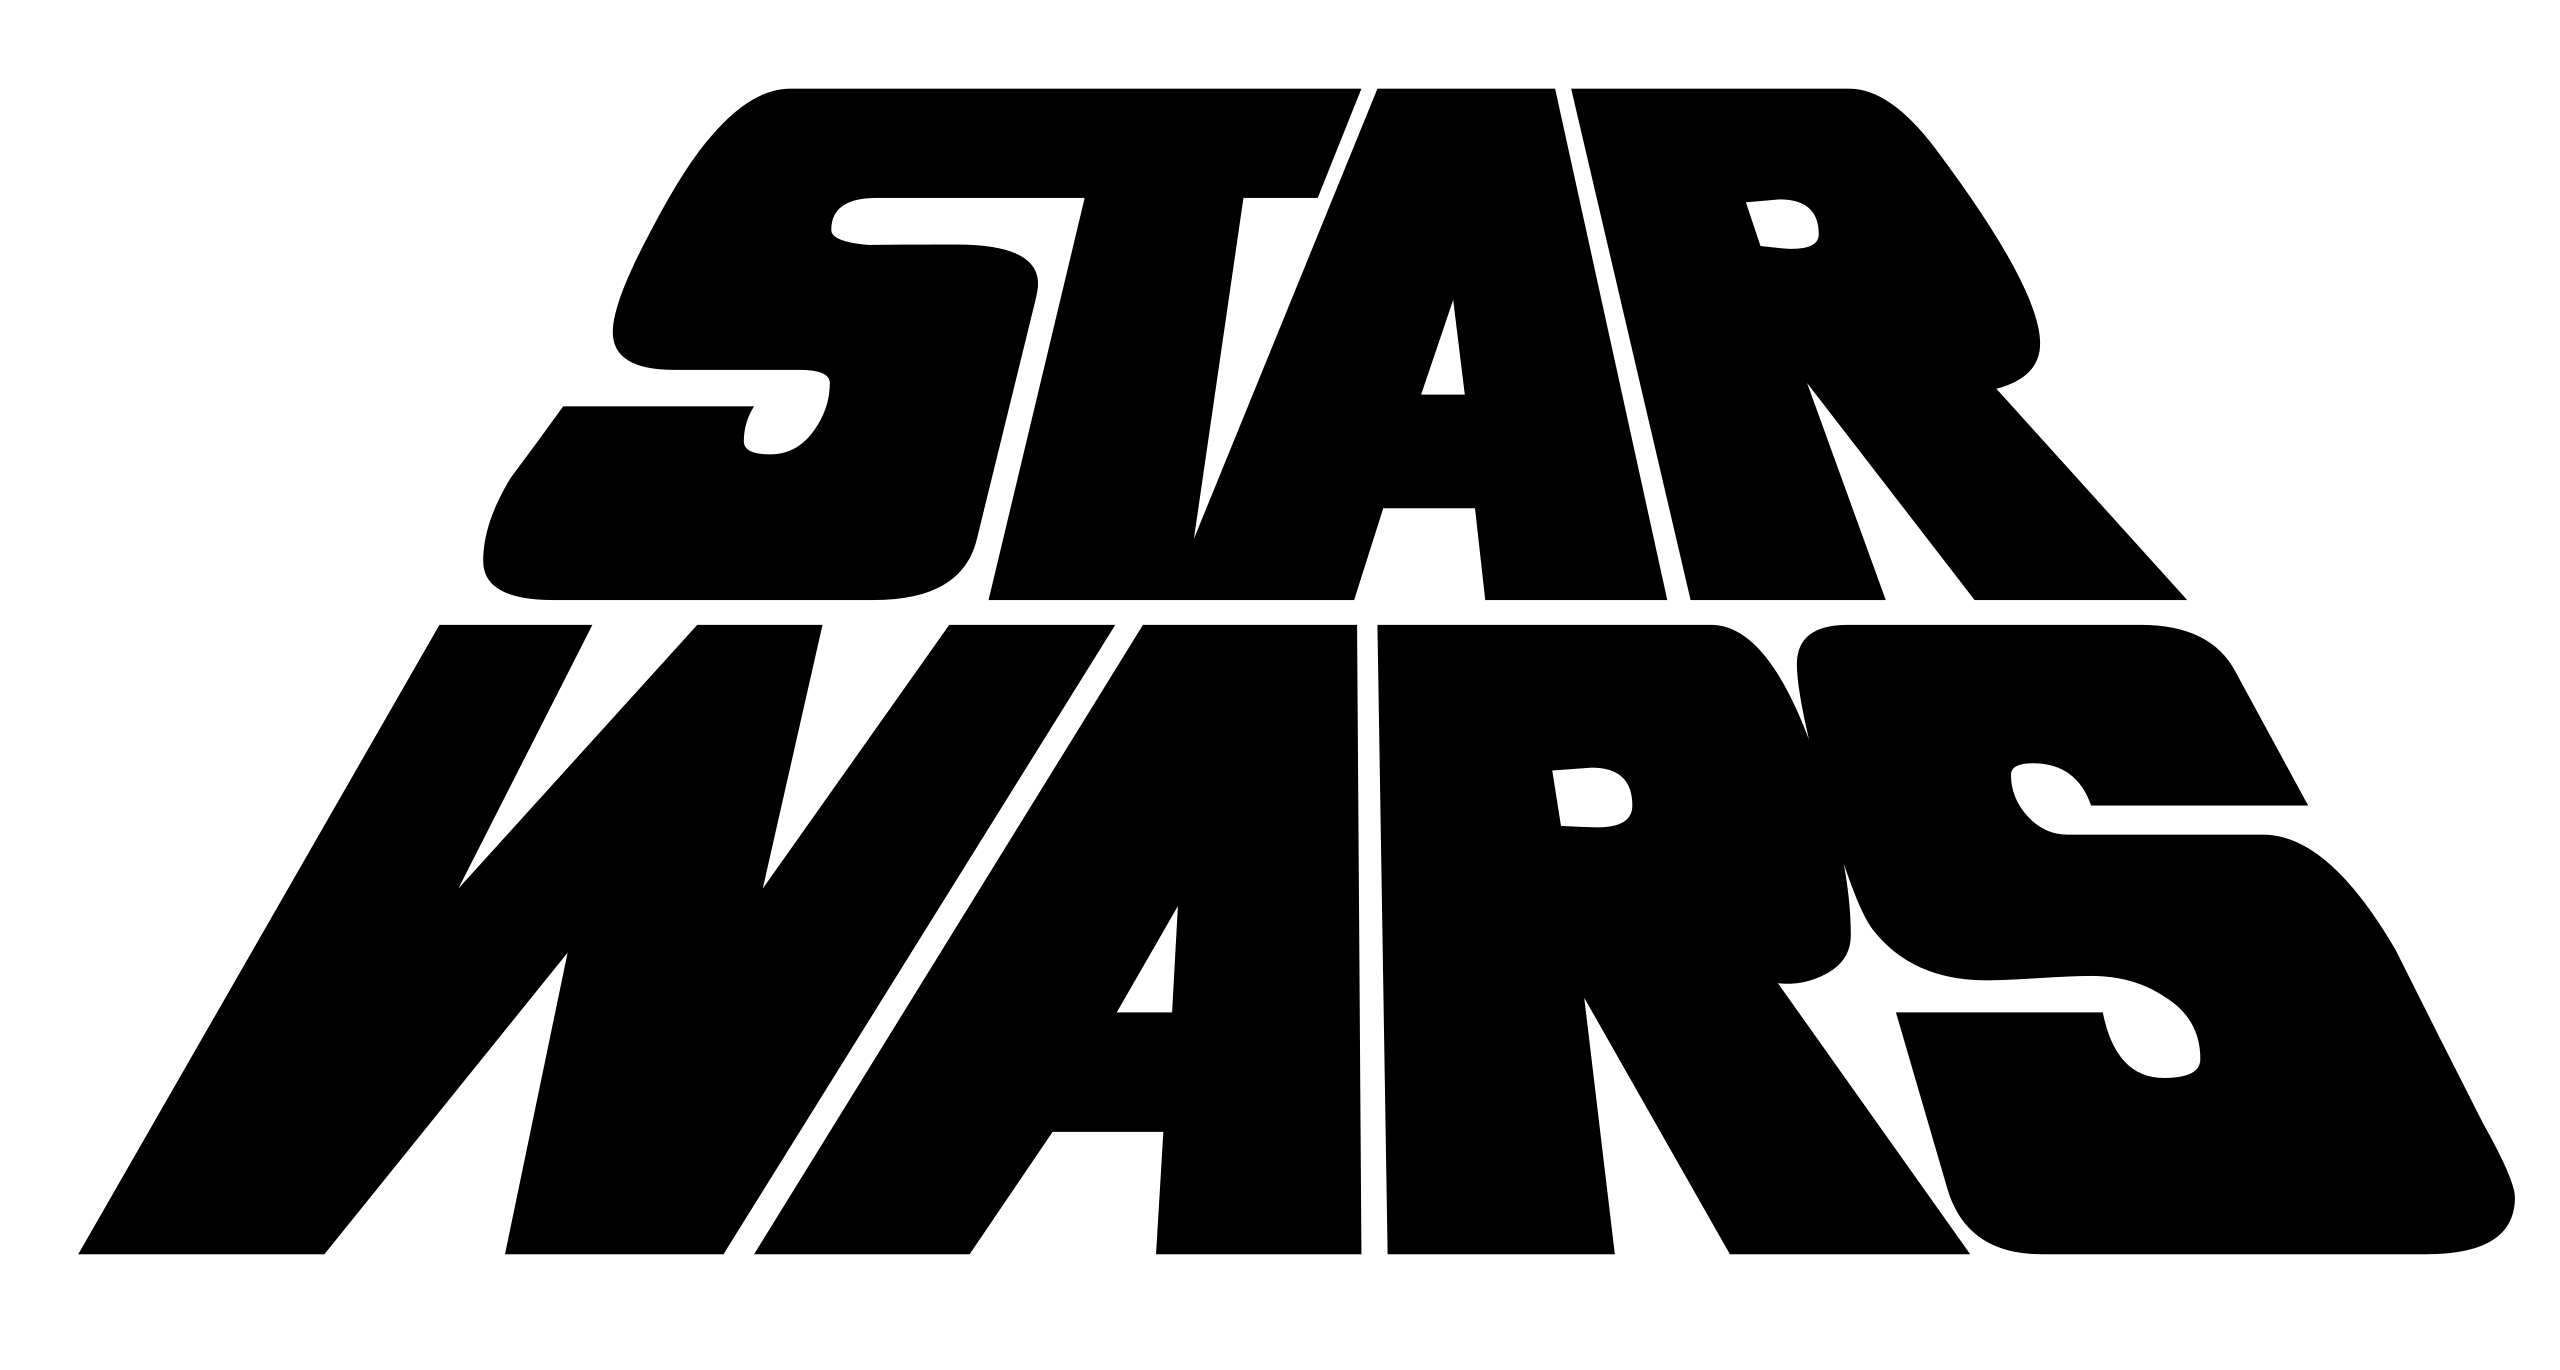

#### The Data

In [1]:
# Import packages
import pandas as pd
import numpy as np

# Import packages for visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Parameters for visualization
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=custom_params)

# Import the dataset, specify encoding
star_wars = pd.read_csv("star_wars.csv", encoding="ISO-8859-1")

In [2]:
star_wars.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,3292879998,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3.0,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
1,3292879538,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
2,3292765271,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1.0,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
3,3292763116,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5.0,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
4,3292731220,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5.0,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


In [3]:
star_wars.columns

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expan

#### Star Wars: Fans

Lets first look at the following two columns:

- 'Have you seen any of the 6 films in the Star Wars franchise?'
- 'Do you consider yourself to be a fan of the Star Wars film franchise?'

Both columns consist of `Yes/No` answers. In instances where the value is `NaN`, respondents opted not to provide an answer. We can use the `pandas.Series.value_counts()` method on a `series` to see all of the `unique` values in a column, accompanied by the `total` frequency of each value.

To simplify the process of analyzing the data, we'll transform each column into a `Boolean` exclusively featuring `True` or `False` values. `Booleans` are easier to work with because we can select the rows that are `True` or `False` without having to do a string comparison. A NaN value suggests that the respondent did not watch a movie and did himself not consider a Star Wars fan or refrained from answering the question. For analytical purposes, we will assume that `NaN` values express a negative answer. Hence did not watch any of the 6 movies or did not consider himself a Star Wars fan.





In [4]:
# Dictionary to define a mapping from each value in series to a new value:
yes_no = {'Yes': True, 'No': False, np.nan: False}

# For loop over the specifiy columns, use the map method on every series with dict 'yes_no'
for col in [
    'Have you seen any of the 6 films in the Star Wars franchise?',
    'Do you consider yourself to be a fan of the Star Wars film franchise?']:

    # use map method on every value of the specific columns
    star_wars[col] = star_wars[col].map(yes_no)

# Check new column values
star_wars.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,3292879998,True,True,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3.0,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
1,3292879538,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
2,3292765271,True,False,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1.0,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
3,3292763116,True,True,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5.0,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
4,3292731220,True,True,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5.0,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


In [5]:
# Lets check how many True, False, NaN values exist
for col in [
    'Have you seen any of the 6 films in the Star Wars franchise?',
    'Do you consider yourself to be a fan of the Star Wars film franchise?']:
    print(star_wars[col].value_counts(dropna=False))
    print('\n')

Have you seen any of the 6 films in the Star Wars franchise?
True     936
False    250
Name: count, dtype: int64


Do you consider yourself to be a fan of the Star Wars film franchise?
False    634
True     552
Name: count, dtype: int64




As we can see above, 936 saw one of the 6 Star Wars films, while 250 said, that the did not see any of the films. Regarding the question, if oneself considers to be a Star Wars fan, 552 said yes, 284 said no and 350 did not answer this question.

In response to the question regarding self-identification as a `Star Wars` fan, 552 respondents answered, that the consider themself as a `Star Wars` fan, 284 respondents indicated, that they do not consider themself as a `Star Wars` fan, and 350 respondents chose not to provide a response to this particular question.





#### Star Wars: Movies Seen

The next six columns relate to a query with a singular checkbox format. Respondents were prompted to select various options by checking specific boxes in response to the inquiry, "Which of the following Star Wars films have you seen? Please select all that apply." 

The columns corresponding to this question are:

- Which of the following Star Wars films have you seen? Please select all that apply — whether or not the respondent saw Star Wars: `Episode I The Phantom Menace`.
- Unnamed: 4 — whether or not the respondent saw `Star Wars: Episode II Attack of the Clones`.
- Unnamed: 5 — whether or not the respondent saw `Star Wars: Episode III Revenge of the Sith`.
- Unnamed: 6 — whether or not the respondent saw `Star Wars: Episode IV A New Hope`.
- Unnamed: 7 — whether or not the respondent saw `Star Wars: Episode V The Empire Strikes Back`.
- Unnamed: 8 — whether or not the respondent saw `Star Wars: Episode VI Return of the Jedi`.

For each of these columns, the presence of the movie title as the cell value indicates that the respondent viewed the corresponding movie. Conversely, a NaN value suggests that the respondent either refrained from answering or did not watch the movie: Like before, for analytical purposes, we will assume the latter scenario. 

To facilitate further analysis, it is necessary to transform each of these columns into a `Boolean` format and subsequently assign a more intuitive column names. The conversion process follows a similar methodology as employed earlier, albeit with the inclusion of both the movie title and `NaN` in the mapping dictionary.

In [6]:
# Create a dicitonary for map method
film_check = {'Star Wars: Episode I  The Phantom Menace': True,
          'Star Wars: Episode II  Attack of the Clones': True,
          'Star Wars: Episode III  Revenge of the Sith': True,
          'Star Wars: Episode IV  A New Hope': True,
          'Star Wars: Episode V The Empire Strikes Back': True,
          'Star Wars: Episode VI Return of the Jedi': True,
          np.nan: False}

# Use map method and dict 'film_check', transform every value to True or False 
for col in star_wars.columns[3:9]:
    star_wars[col] = star_wars[col].map(film_check)

In [7]:
# Check the new column values
star_wars.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,3292879998,True,True,True,True,True,True,True,True,3.0,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
1,3292879538,False,False,False,False,False,False,False,False,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
2,3292765271,True,False,True,True,True,False,False,False,1.0,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
3,3292763116,True,True,True,True,True,True,True,True,5.0,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
4,3292731220,True,True,True,True,True,True,True,True,5.0,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


Next, we will `rename` the columns to reflect what they represent. For this process we can use the `pandas.DataFrame.rename()` method.





In [8]:
star_wars = star_wars.rename(columns=
                 {'Which of the following Star Wars films have you seen? Please select all that apply.' : 'seen_1',
                  'Unnamed: 4' : 'seen_2',
                  'Unnamed: 5' : 'seen_3',
                  'Unnamed: 6' : 'seen_4',
                  'Unnamed: 7' : 'seen_5',
                  'Unnamed: 8' : 'seen_6'
                 })

star_wars.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,3292879998,True,True,True,True,True,True,True,True,3.0,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
1,3292879538,False,False,False,False,False,False,False,False,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
2,3292765271,True,False,True,True,True,False,False,False,1.0,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
3,3292763116,True,True,True,True,True,True,True,True,5.0,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
4,3292731220,True,True,True,True,True,True,True,True,5.0,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


#### Star Wars: Movie Ranking

In the subsequent six columns, participants are prompted to rank the Star Wars movies in ascending order of preference, where the numerical values 1 through 6 signify their ranking from most favored (1) to least favored (6). Each of the following column may contain values such as 1, 2, 3, 4, 5, 6, or NaN, representing the respondent's ranking or a non-response:

- Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film. - How much the respondent liked Star Wars: `Episode I The Phantom Menace`
- Unnamed: 10 — How much the respondent liked `Star Wars: Episode II Attack of the Clones`
- Unnamed: 11 — How much the respondent liked `Star Wars: Episode III Revenge of the Sith`
- Unnamed: 12 — How much the respondent liked `Star Wars: Episode IV A New Hope`
- Unnamed: 13 — How much the respondent liked `Star Wars: Episode V The Empire Strikes Back`
- Unnamed: 14 — How much the respondent liked `Star Wars: Episode VI Return of the Jedi`

These columns are relatively straightforward to clean. Our task involves converting each column to a numeric type and subsequently renaming them for enhanced clarity regarding their representation. 

To accomplish the numeric conversion, the `pandas.DataFrame.astype()` method for DataFrames is employed. First we will `rename` the columns, then we transform them to `float` type

In [9]:
# Rename the specific columns
star_wars = star_wars.rename(columns={
        "Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.": "ranking_1",
        "Unnamed: 10": "ranking_2",
        "Unnamed: 11": "ranking_3",
        "Unnamed: 12": "ranking_4",
        "Unnamed: 13": "ranking_5",
        "Unnamed: 14": "ranking_6"
        })

In [10]:
# Convert the specific columns to float type
star_wars[star_wars.columns[9:15]] = star_wars[star_wars.columns[9:15]].astype(float)

# Calculate the mean vlaue for each column
star_wars[star_wars.columns[9:15]].mean()

ranking_1    3.732934
ranking_2    4.087321
ranking_3    4.341317
ranking_4    3.272727
ranking_5    2.513158
ranking_6    3.047847
dtype: float64

We shall represent these data points through the visualization of a bar plot below.

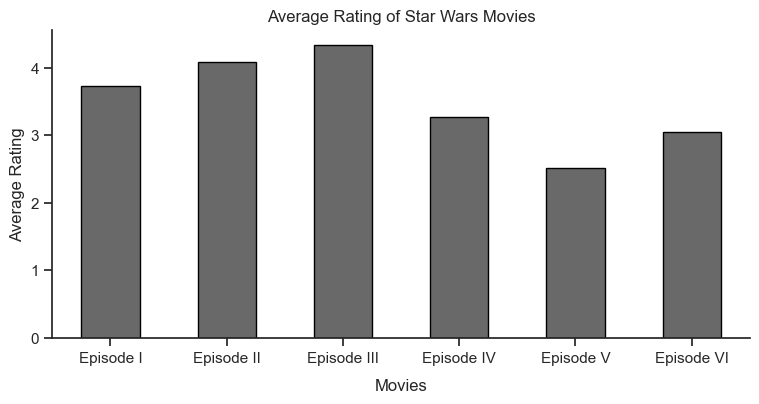

In [11]:
# Set plot size and safe labels for xaxis
plt.figure(figsize=(9,4))
labels = ['Episode I', 'Episode II', 'Episode III', 'Episode IV', 'Episode V', 'Episode VI']

# Plotting the bar chart
ax = star_wars.iloc[:,9:15].mean().plot(kind='bar', rot=0, color='dimgrey', edgecolor='black')

# Adding labels and title
plt.xlabel('Movies', labelpad=10)
plt.ylabel('Average Rating')
plt.title('Average Rating of Star Wars Movies')
ax.set_xticklabels(labels)

plt.show()

Throughout the initial phases of our analysis, we conducted extensive data cleansing procedures. Initially, we undertook a comprehensive review of the dataset, gaining a preliminary understanding. Subsequently, we addressed the cleansing of columns 1 and 2, followed by columns 3 to 8 and columns 9 to 14. Employing the `map` method, we transformed values from `Yes` to `True` and `NaN` or `No` to `False`.

Additionally, we undertook the renaming of specific columns to enhance clarity. In the concluding stages, we computed the `mean` rating points for each movie on a scale of `1` (good) to `6` (bad) and illustrated the outcomes through a `bar graph`. As we suspected, it looks like the `'original'` movies are rated much more highly than the newer ones. `Episode V: The Empire Strikes Back` emerged as the highest-rated, while `Episode III: Revenge of the Sith` garnered the lowest rating.

#### Star Wars: Most Viewed Movie

Earlier in this project, we addressed the preprocessing of the `seen` columns, converting their values to the `Boolean` data type. When using methods such as `pandas.DataFrame.sum()` or `mean()`, `Boolean` values are treated like integers, interpreting `True` as `1` and `False` as `0`. This allows us to find out the number of individuals who have viewed each movie by simply calculating the `sum` of the respective column, notwithstanding its `Boolean` nature.





In [12]:
star_wars.iloc[:,3:9].sum()

seen_1    673
seen_2    571
seen_3    550
seen_4    607
seen_5    758
seen_6    738
dtype: int64

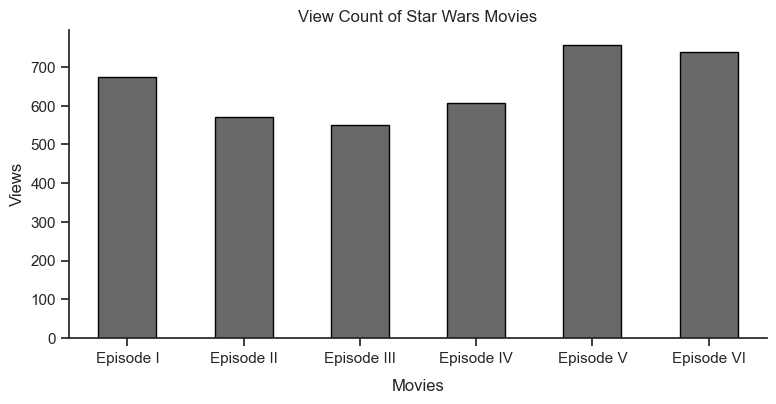

In [13]:
# Set plot size and safe labels for xaxis
plt.figure(figsize=(9,4))
labels = ['Episode I', 'Episode II', 'Episode III', 'Episode IV', 'Episode V', 'Episode VI']

# Plotting the bar chart
ax = star_wars.iloc[:,3:9].sum().plot(kind='bar', rot=0, color='dimgrey', edgecolor='black')

# Adding labels and title
plt.xlabel('Movies', labelpad=10)
plt.ylabel('Views')
plt.title('View Count of Star Wars Movies')
ax.set_xticklabels(labels)

plt.show()

As depicted in the preceding visualization, we initially calculated the `sum` of `True` values within the `seen` columns, subsequently presenting the results graphically. The movie with the highest viewership is `Episode V: The Empire Strikes Back`, which concurrently received the highest rating, while `Episode III: Revenge of the Sith`, with the lowest viewership, was also rated the least favorably. 

This correlation is logical, as a well-received movie tends to attract a broader audience, including individuals who may not identify as dedicated `Star Wars` enthusiasts. Conversely, less positively reviewed movies may primarily draw viewers from the dedicated fanbase.

Furthermore, an observation is made that respondents exhibited a higher viewership for the original movies compared to the newer releases. This aligns with the earlier ranking data, indicating a prevailing preference for the earlier Star Wars movies.

#### Star Wars: Character Ranking

Lets look at the characters and answer the question which of the characters are most liked by the audinc

In [14]:
# First look at the character rating column
star_wars.iloc[:,15].value_counts()

Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.
Very favorably                                 610
Somewhat favorably                             151
Neither favorably nor unfavorably (neutral)     44
Unfamiliar (N/A)                                15
Somewhat unfavorably                             8
Very unfavorably                                 1
Name: count, dtype: int64

In [15]:
# Create a dictionary to transform values from specific column 
character_rating = {'Very favorably' : 5, 
                    'Somewhat favorably' : 4, 
                    'Neither favorably nor unfavorably (neutral)' : 3, 
                    'Somewhat unfavorably' : 2, 
                    'Very unfavorably': 1, 
                    'Unfamiliar (N/A)' : np.nan,
                   np.nan : np.nan}

# use the dictionary above to map new values to the specific columns
for col in star_wars.columns[15:29]:
    star_wars[col] = star_wars[col].map(character_rating)

In [16]:
# Check dtypes of specific columns -- float
star_wars.iloc[:, 15:29].head()

,"Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.",Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28
0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,NaN,NaN,5.0,5.0,5.0,5.0,5.0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4.0,4.0,4.0,4.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5.0,5.0,5.0,5.0,5.0,4.0,5.0,4.0,2.0,5.0,5.0,5.0,5.0,5.0
4,5.0,4.0,4.0,2.0,5.0,1.0,4.0,3.0,5.0,4.0,4.0,1.0,4.0,4.0


In [17]:
# Renmae the columns to the character names
star_wars = star_wars.rename(columns={'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.': 'Han Solo',
'Unnamed: 16' : 'Luke Skywalker', 
'Unnamed: 17' : 'Princess Leia Organa',
'Unnamed: 18' : 'Anakin Skywalker', 
'Unnamed: 19' : 'Obi Wan Kenobi', 
'Unnamed: 20' : 'Emperor Palpatine', 
'Unnamed: 21' : 'Darth Vader', 
'Unnamed: 22' : 'Lando Calrissian', 
'Unnamed: 23' : 'Boba Fett', 
'Unnamed: 24' : 'C-3P0',
'Unnamed: 25' : 'R2 D2',
'Unnamed: 26' : 'Jar Jar Binks',
'Unnamed: 27' : 'Padme Amidala',
'Unnamed: 28' : 'Yoda'
                                     })

# Check the new column names
star_wars.iloc[:,15].value_counts()

Han Solo
5.0    610
4.0    151
3.0     44
2.0      8
1.0      1
Name: count, dtype: int64

In [18]:
# Calculate the mean value for character rating (1 - very unfavorably, 5 - very favorably)
star_wars.iloc[:, 15:29].mean().sort_values(ascending=False)

Han Solo                4.671990
Obi Wan Kenobi          4.632426
Yoda                    4.629902
Luke Skywalker          4.580606
R2 D2                   4.569512
Princess Leia Organa    4.555286
C-3P0                   4.403941
Anakin Skywalker        3.775616
Lando Calrissian        3.636905
Padme Amidala           3.604615
Darth Vader             3.479167
Boba Fett               3.357353
Emperor Palpatine       3.071429
Jar Jar Binks           2.780899
dtype: float64

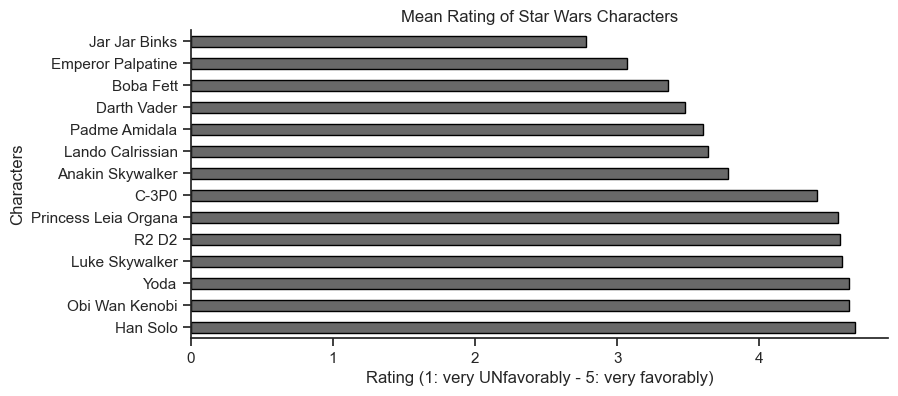

In [19]:
plt.figure(figsize=(9,4))

# Create a barh plot for the characters and specific mean values
star_wars.iloc[:,15:30].mean(numeric_only=True).sort_values(ascending=False).plot(kind='barh', color='dimgrey', edgecolor='black')

# Adding labels and title
plt.xlabel('Rating (1: very UNfavorably - 5: very favorably)')
plt.ylabel('Characters')
plt.title('Mean Rating of Star Wars Characters')

plt.show()

In the preceding analysis, we systematically processed the columns corresponding to each character. Initially, we used the `map` method to numerically encode the `categorical` values. Subsequently, the columns were methodically `renamed` to align with the respective `character` names. Ultimately, we computed the `mean` ratings for each `character` and visualized the results through a horizontal bar chart, displayed above. 

Notably, characters such as `Yoda`, `R2 D2`, `Obi Wan Kenobi`, and `Han Solo` garnered the highest `mean` ratings, indicating a greater degree of popularity. Conversely, characters like `Jar Jar Binks`, `Emperor Palpatine`, and `Boba Fett` were perceived less favorably, securing lower `mean` ratings in the evaluation.





#### Star Wars: Rating by Education

Now, we turn our attention to the intersection of educational attainment and movie ratings. In essence, our question centers around discerning whether a noteworthy disparity exists between the `ratings` assigned to movies and the `educational levels` of the survey respondents.





In [20]:
star_wars['Education'].value_counts()

Education
Some college or Associate degree    328
Bachelor degree                     321
Graduate degree                     275
High school degree                  105
Less than high school degree          7
Name: count, dtype: int64

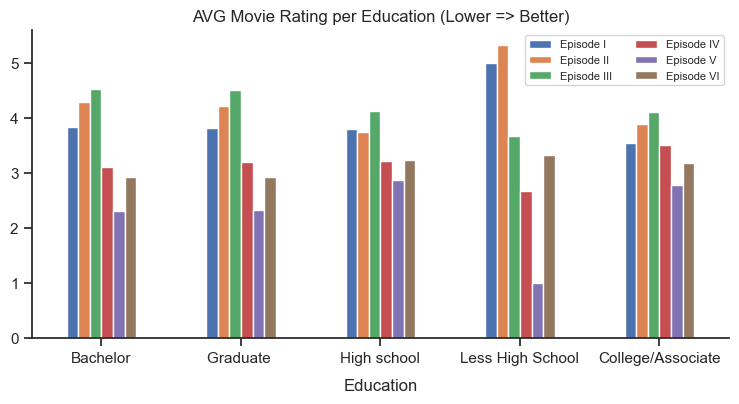

In [21]:
# Group the education column and calculate the mean rating values for every movie
ax = star_wars.groupby('Education')[['ranking_1', 
                                'ranking_2', 
                                'ranking_3',
                                'ranking_4', 
                                'ranking_5',
                               'ranking_6']].mean(numeric_only=True).plot(kind='bar', figsize=(9, 4), rot=0)

# Customize x_tick labels
ax.set_xticklabels(['Bachelor', 'Graduate ', 'High school', 'Less High School', 'College/Associate'])

# Adjust xlabel space
ax.xaxis.labelpad = 10

# Set legend values and title
plt.legend(['Episode I', 'Episode II', 'Episode III', 'Episode IV', 'Episode V', 'Episode VI'], loc='upper right', ncol=2, fontsize=8)
plt.title('AVG Movie Rating per Education (Lower => Better)')

plt.show()

We turned our attention to the intersection of educational attainment and movie ratings. Upon examination, a consistent trend emerges across all educational groups, wherein `Episode V The Empire Strikes Back` consistently attains the highest mean rating. The second-highest-rated movie exhibits some variability, with `Episode IV A New Hope` and `Episode VI Return of the Jedi` vying for the second place. Specifically, among individuals with a `Bachelor's`, `Graduate`, or `College/Associate` education, `Episode VI Return of the Jedi` secures the second highest rating. 

Conversely, in the `High School` and `Less High School` education groups, `Episode IV A New Hope` attains the second superior rating. Remarkably, irrespective of educational background, the least favorably rated movies across all groups are consistently `Episode I The Phantom Menace`, `Episode II Attack of the Clones`, and `Episode III Revenge of the Sith`. Notably, within the `Less High School` education category, `Episode II Attack of the Clones` incurs the lowest rating among the movies assessed





#### Star Wars: Gender

Let us investigate potential variations in both the `ratings` and `viewership counts` across different `genders`.





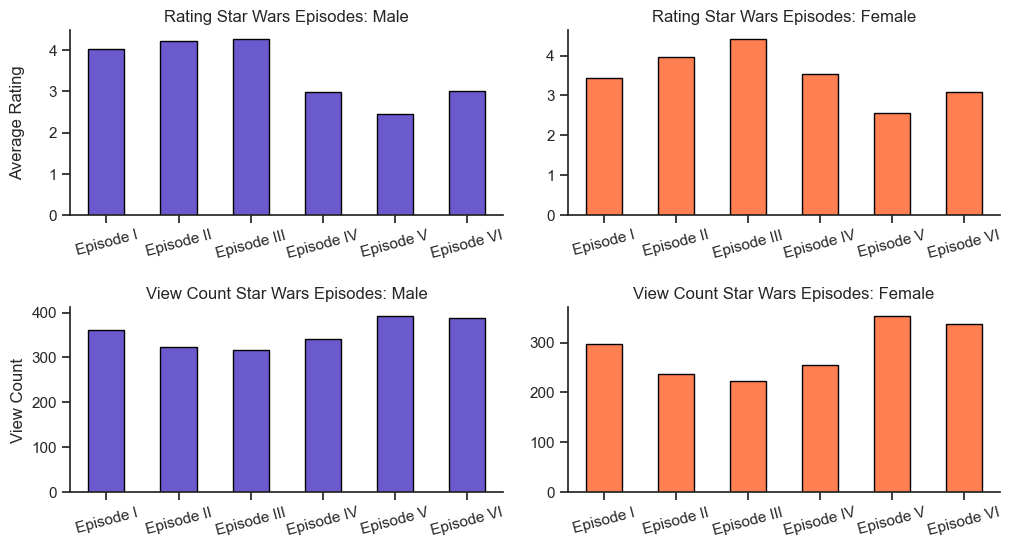

In [22]:
# Filter dataset for male and female respondents
males = star_wars[star_wars["Gender"] == "Male"]
females = star_wars[star_wars["Gender"] == "Female"]

# Create lit for labels, adjust figure size and horizontal/vertical spacing between subplots
labels = ['Episode I', 'Episode II', 'Episode III', 'Episode IV', 'Episode V', 'Episode VI']
plt.figure(figsize=(12,6))
plt.subplots_adjust(hspace = 0.5, wspace= 0.15)

# Create first plot
ax1 = plt.subplot(2,2,1)
males[males.columns[9:15]].mean().plot(kind='bar', rot=15, color='slateblue', edgecolor='black')
ax1.set_xticklabels(labels)
plt.title('Rating Star Wars Episodes: Male')

# Adjust ylabel spacing to match second column subplot
plt.ylabel('Average Rating', labelpad=17)

# Create second plot
plt.subplot(2,2,2)
ax2 = females[females.columns[9:15]].mean().plot(kind='bar', rot=15, color='coral', edgecolor='black')
ax2.set_xticklabels(labels)
plt.title('Rating Star Wars Episodes: Female')

# Create third plot
plt.subplot(2,2,3)
ax3 = males[males.columns[3:9]].sum().plot(kind='bar', rot=15, color='slateblue', edgecolor='black')
ax3.set_xticklabels(labels)
plt.title('View Count Star Wars Episodes: Male')
plt.ylabel('View Count')

# Create fourth plot
plt.subplot(2,2,4)
ax4 = females[females.columns[3:9]].sum().plot(kind='bar', rot=15, color='coral', edgecolor='black')
ax4.set_xticklabels(labels)
plt.title('View Count Star Wars Episodes: Female')

plt.show()

Curiously, a `gender-based` analysis reveals that a greater number of `males` viewed episodes I, II and III; however, `males` expressed considerably lower satisfaction with these episodes compared to their `female` counterparts.





#### Conclusion

A long time ago, in the realm of data galaxies, our quest began with the noble task of cleaning the data, preparing it for the grand analysis. Through the vast responses, the saga of `Star Wars` movies unfolded, revealing the mighty triumph of `Episode V: The Empire Strikes Back` as the highest-rated celestial tale, while the dark shadows of `Episode III: Revenge of the Sith` earned the lowest rating.

In the cosmic theater of viewership, `Episode V: The Empire Strikes Back` shone as the most-watched cosmic spectacle, reigning supreme with the highest rating. Meanwhile, the cosmic forces aligned to deem `Episode III: Revenge of the Sith` as both the least-watched and least favored among the constellations.

Venturing into the galactic realm of beloved characters, luminaries such as `Yoda`, `R2-D2`, `Obi-Wan Kenobi`, and `Han Solo` emerged with the highest mean ratings, signifying their cosmic popularity. In the cosmic balance, characters like `Jar Jar Binks`, `Emperor Palpatine`, and `Boba Fett` faced a less favorable cosmic fate, securing lower mean ratings.

Turning our gaze to the cosmic scholars' realm of education, across the galaxies of various educational backgrounds, `Episode V: The Empire Strikes Back` consistently soared to the cosmic heights of the highest mean rating. Yet, the movies `Episode I: The Phantom Menace`, `Episode II: Attack of the Clones`, and `Episode III: Revenge of the Sith` faced universal disdain, garnering the lowest cosmic ratings.

In the cosmic constellations of education, subtle differences emerged. Among those bearing the knowledge banner of a `Bachelor's`, `Graduate`, or `College/Associate` education, `Episode VI: Return of the Jedi` claimed the second-highest cosmic rating. However, within the cosmic realm of `Less High School` education, `Episode II: Attack of the Clones` plummeted to the cosmic depths as the lowest-rated luminary.

Our cosmic exploration delved into the binary cosmos of `gender`, uncovering an intriguing celestial dance. More cosmic `males` gazed upon the chronicles of episodes I, II, and III, yet their cosmic satisfaction waned compared to their `female` counterparts. The cosmic forces revealed that the galaxies of `male` viewers expressed a diminished cosmic affinity for these episodes, adding a twist to our cosmic odyssey.